# Kaggle titanic classification

column 설명
- PassengerId : 승객 번호
- Survived : 생존여부(1: 생존, 0 : 사망)
- Pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
- Name : 승객 이름
- Sex : 승객 성별
- Age : 승객 나이 
- SibSp : 동반한 형제자매, 배우자 수
- Patch : 동반한 부모, 자식 수
- Ticket : 티켓의 고유 넘버
- Fare 티켓의 요금
- Cabin : 객실 번호
- Embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)

In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

#모델 종류 모듈 import
#from sklearn.neighbors import KNeighborsClassifier as knc #KNN
#from sklearn.naive_bayes import BernoulliNB #나이브베이즈
#from sklearn import tree #의사결정트리
#from sklearn.linear_model import LogisticRegression as lg #로지스틱 회귀
from sklearn.ensemble import RandomForestClassifier as rf #랜덤포레스트
from sklearn import svm #서포트벡터머신
#from xgboost import XGBClassifier as xgb
#from lightgbm import LGBMClassifier as lgbm

#모델 평가 모듈 import
from sklearn.metrics import cohen_kappa_score as kappa #카파통계량
from sklearn import metrics  #정확도,정밀도,재현율 등

In [7]:
flag = 'train' #훈련,테스트 flag #'train' / 'test'
model_flag = 'rf' #모델 flag 

## Data Load

In [16]:
df = pd.read_csv("c:\\titanic\\train.csv")
testdf = pd.read_csv("c:\\titanic\\test.csv")

pd.set_option('display.max_columns', len(df.columns))

print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## EDA (Exploratory Data Analysis)

숫자값들에 대한 상관관계 heatmap

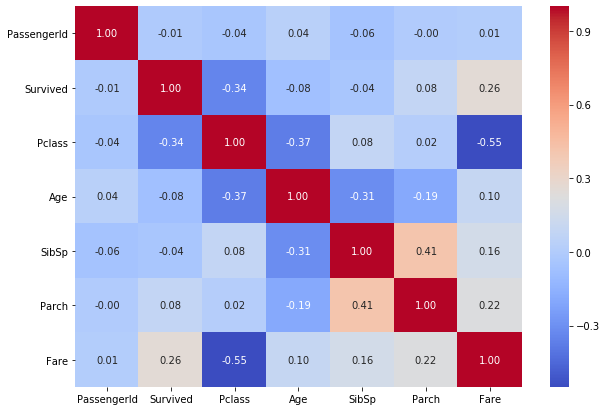

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [3]:
test = (df['Pclass'] == 1) & (df['Sex']=='female') & (df['Survived']==1)
print(test.astype(int).sum())

91


Survived - Sex 탐색

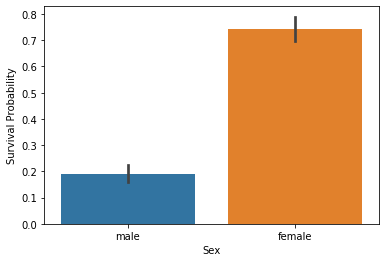

In [19]:
g = sns.barplot(x="Sex",y="Survived",data=df)
g = g.set_ylabel("Survival Probability")

Survived - Pclass 탐색

C:\Users\insun\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\insun\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


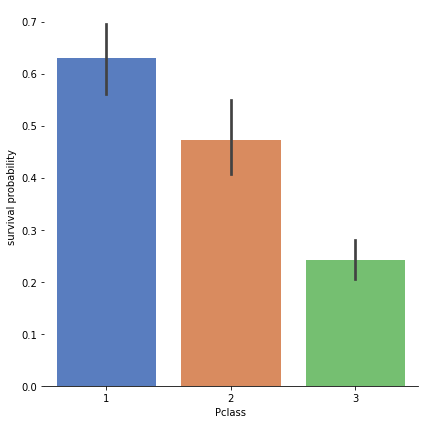

In [20]:
g = sns.factorplot(x="Pclass",y="Survived",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Survived - Pclass,Sex 탐색

C:\Users\insun\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\insun\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


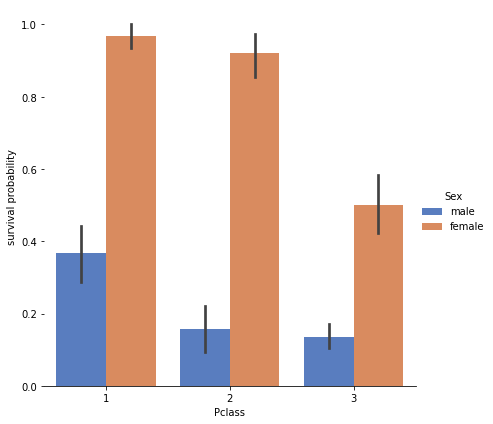

In [21]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Survived - Age 탐색

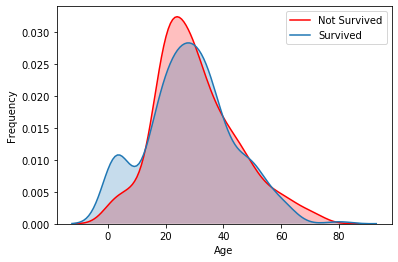

In [28]:
g = sns.kdeplot(df["Age"][(df["Survived"] == 0) & (df["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["Age"][(df["Survived"] == 1) & (df["Age"].notnull())], ax =g, shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

Survived - SibSp 탐색

C:\Users\insun\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\insun\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


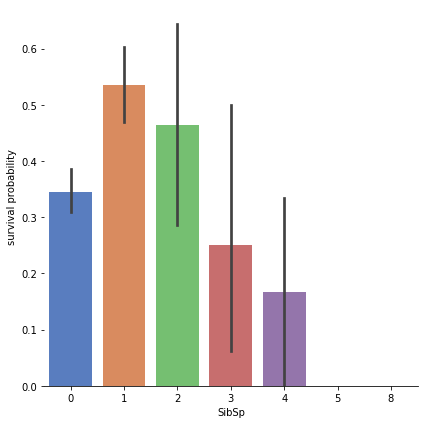

In [29]:
g = sns.factorplot(x="SibSp",y="Survived",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Survived - Parch 탐색

C:\Users\insun\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\insun\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


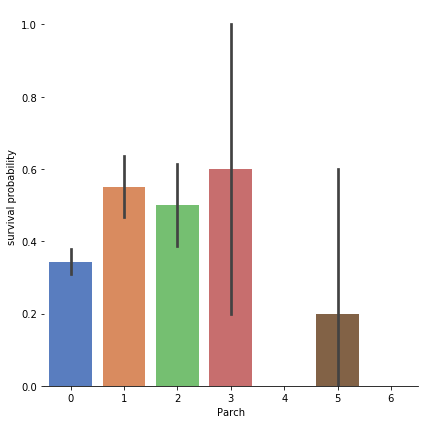

In [30]:
g  = sns.factorplot(x="Parch",y="Survived",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Fare 데이터 분포 확인

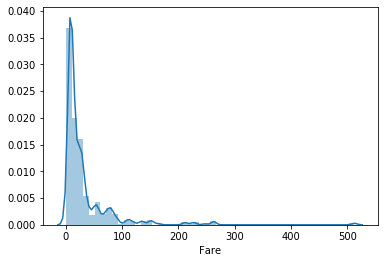

In [25]:
sns.distplot(df["Fare"], label="Skewness : %.2f"%(df["Fare"].skew()))

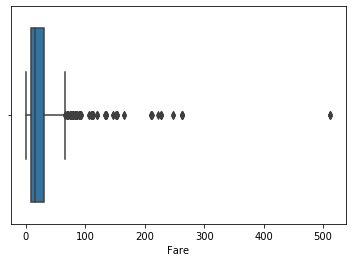

In [31]:
sns.boxplot(x = df['Fare'])

C:\Users\insun\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


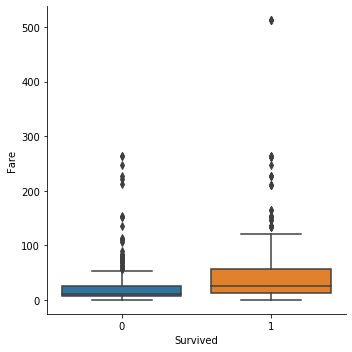

In [32]:
sns.factorplot(x="Survived", y = "Fare",data = df, kind="box")

Age 컬럼 이상치 확인

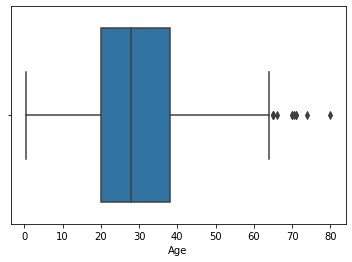

In [4]:
sns.boxplot(x = df['Age'])

C:\Users\insun\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


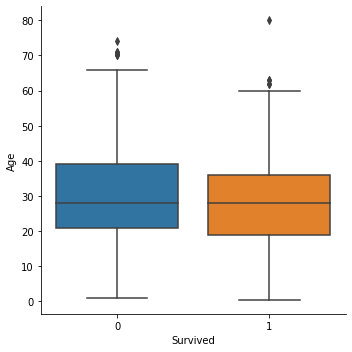

In [22]:
sns.factorplot(x="Survived", y = "Age",data = df, kind="box")

## Data Cleaning

In [6]:
#데이터 전처리 작업 함수
def dataPr(df) :
    
    #fare의 이상치 값 최빈값으로 대체
    most_fare = df['Fare'].mode()
    df['Fare'][df['Fare'] > df['Fare'].std()*5] = most_fare
    df['Fare'].fillna(most_fare, inplace=True)
    df["Fare"] = df["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

    #Cabin NaN값은 X로 변경
    df = df.drop(['Cabin'],axis=1)   

    #Name 컬럼 처리
    df_title = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]
    df["Title"] = pd.Series(df_title)
    df["Title"] = df["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df["Title"] = df["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
    df["Title"] = df["Title"].astype(int)
    df.drop(['Name'], axis = 1,inplace=True)

    #Age
    index_NaN_age = list(df["Age"][df["Age"].isnull()].index)

    for i in index_NaN_age :
        age_med = df["Age"].median() #Age 전체의 대한 중앙값
        
        # SibSp, Parch, Pclass 마다 데이터가 같은 것끼리의 Age의 중앙값을 구한다.
        age_pred = df["Age"][((df['SibSp'] == df.iloc[i]["SibSp"]) & (df['Parch'] == df.iloc[i]["Parch"]) & (df['Pclass'] == df.iloc[i]["Pclass"]))].median()
        
        if not np.isnan(age_pred) : 
            df['Age'].iloc[i] = age_pred
        else : #age_pred가 없는 경우 전체 중앙값으로 대체
            df['Age'].iloc[i] = age_med
    
    
    #Embarked 최빈값 대체
    most_emb = df['Embarked'].mode()
    df['Embarked'].fillna(most_emb, inplace=True)
    onehot_emb = pd.get_dummies(df['Embarked'], prefix='town')
    df = pd.concat([df,onehot_emb],axis=1)
    df.drop(['Embarked'],axis=1,inplace=True)
    
    #성별
    df['Sex'] = pd.get_dummies(df['Sex'])
    
    #여자와 아이 파생변수 추가
    child_women = (df['Sex'] == 1) | (df['Age'] < 10)
    df['child_women'] = child_women.astype(int)
    
    df.drop(['Ticket','PassengerId'],axis=1,inplace=True)
    
    return df

In [8]:
if flag == 'train' : 
    ndf = dataPr(df)
else : 
    ndf = dataPr(testdf)

print(ndf)
print(ndf.columns)

C:\Users\insun\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\insun\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


     Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Title  town_C  \
0           0       3    0  22.0      1      0  1.981001      2       0   
1           1       1    1  38.0      1      0  4.266662      1       1   
2           1       3    1  26.0      0      0  2.070022      1       0   
3           1       1    1  35.0      1      0  3.972177      1       0   
4           0       3    0  35.0      0      0  2.085672      2       0   
..        ...     ...  ...   ...    ...    ...       ...    ...     ...   
886         0       2    0  27.0      0      0  2.564949      3       0   
887         1       1    1  19.0      0      0  3.401197      1       0   
888         0       3    1  13.5      1      2  3.154870      1       0   
889         1       1    0  26.0      0      0  3.401197      2       1   
890         0       3    0  32.0      0      0  2.047693      2       0   

     town_Q  town_S  child_women  
0         0       1            0  
1         0       0          

데이터 전처리 후 상관관계 heatmap

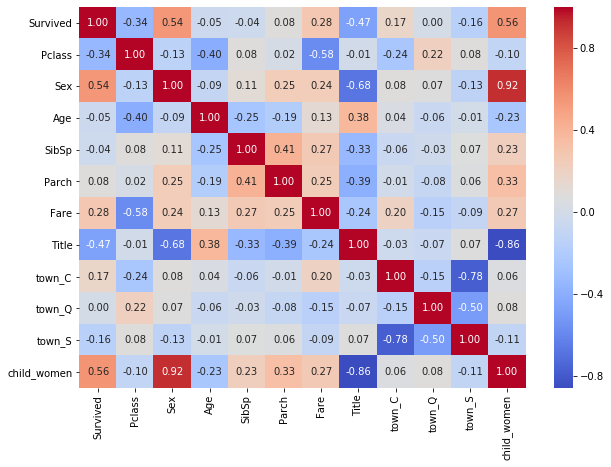

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 7))
sns.heatmap(ndf.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

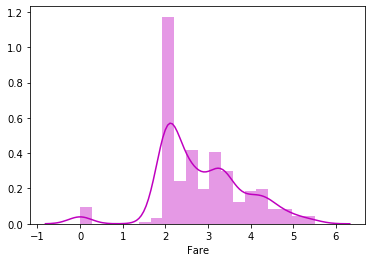

In [10]:
sns.distplot(ndf["Fare"], color="m", label="Skewness : %.2f"%(ndf["Fare"].skew()))

In [11]:
col_list = list(ndf.columns)

In [12]:
if flag == 'train' : 
    X = ndf[col_list[1:]] #독립변수 지정
    y = ndf['Survived'] #종속변수 지정
else :
    X = ndf[col_list[:]]

print(X)

     Pclass  Sex   Age  SibSp  Parch      Fare  Title  town_C  town_Q  town_S  \
0         3    0  22.0      1      0  1.981001      2       0       0       1   
1         1    1  38.0      1      0  4.266662      1       1       0       0   
2         3    1  26.0      0      0  2.070022      1       0       0       1   
3         1    1  35.0      1      0  3.972177      1       0       0       1   
4         3    0  35.0      0      0  2.085672      2       0       0       1   
..      ...  ...   ...    ...    ...       ...    ...     ...     ...     ...   
886       2    0  27.0      0      0  2.564949      3       0       0       1   
887       1    1  19.0      0      0  3.401197      1       0       0       1   
888       3    1  13.5      1      2  3.154870      1       0       0       1   
889       1    0  26.0      0      0  3.401197      2       1       0       0   
890       3    0  32.0      0      0  2.047693      2       0       1       0   

     child_women  
0       

In [14]:
# train데이터 분류
if flag == 'train' :
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

    print(x_train.shape) #(499, 9)
    print(x_test.shape) #(215, 9)
    print(y_train.shape) #(499,)
    print(y_test.shape) #(215,)

(623, 11)
(268, 11)
(623,)
(268,)


## GridSearchCV - 랜덤포레스트

In [ ]:
#하이퍼파라미터 찾는 작업
if flag == 'train' :     
    #model = lg(C=1000,random_state=0)
    #model.fit(x_train, y_train)
        
    if model_flag == 'rf' : #랜덤포레스트
        n_estimators = [int(x) for x in np.linspace(100, 500, num = 5)]
        max_depth = [int(x) for x in np.linspace(1, 10, num = 5)]
        
        hyperModel = rf()
        params = {'n_estimators' : n_estimators #[100, 200, 300] #트리 개수
                  ,'max_depth': max_depth #[1, 3, 5]  #트리 최대 깊이
                  ,'min_samples_split' : [2,3,5] #내부 노드 나누기 위해 필요한 최소 샘플 개수(과적합 제어 - 낮을수록 분할노드 많아짐.)
                  ,'oob_score' : [True,False]
                  #,'max_features' : ['auto','log2'] #노드 분할 시, 사용하는 기능 (auto,log2,...)
                  #,'min_samples_leaf' : [] #리프노드에 있어야 하는 최소 샘플 개수
                  #,'bootstrap' : True/False (Fasle : 데이터셋을 각 트리에 분할)
                  }
    
    grid = GridSearchCV(hyperModel, param_grid=params, cv=5)
    grid.fit(x_train,y_train)
    
    print(grid.best_params_)
    print(grid.best_score_)

## Modeling

In [15]:
#찾은 하이퍼파라미터 적용 후 모델 평가 
if flag == 'train' :
    if model_flag == 'svm' : #서포트벡터머신
        model = svm.SVC()
    elif model_flag == 'rf' : #랜덤포레스트
        model = rf(n_estimators=400,oob_score=False,max_depth=10,min_samples_split=3)
    elif model_flag == 'xgb' : #앙상블 XGBoost
        model = xgb()
    elif model_flag == 'lgbm' : #앙상블 LightGBM
        model = lgbm()

    model.fit(x_train, y_train) #하이퍼파라미터 적용

    y_pred = model.predict(x_test) #테스트데이터 예측
    
    model_mat = metrics.confusion_matrix(y_test,y_pred) #혼동행렬    
    tn,fp,fn,tp = model_mat.ravel()
    
    print(model_mat)
    print('TN : {0} / FP : {1} / FN : {1} / TP : {2}'.format(tn,fp,fn,tp))
    
    report = metrics.classification_report(y_test,y_pred)
    print(report)
    
    # 1 생존에 대한 수치
    precision = metrics.precision_score(y_test, y_pred) #정밀도
    recall = metrics.recall_score(y_test, y_pred) #재현율
    f1_score = metrics.f1_score(y_test, y_pred) #f1-score
    accuracy = metrics.accuracy_score(y_test, y_pred) #정확도
    kappa_st = kappa(y_test,y_pred) #카파통계량
    roc = metrics.roc_auc_score(y_test,y_pred) #ROC
    
    m_dict = { model_flag+' model' : ['accuracy','precision','recall','f1-score','kappa','roc'],
              '1 data' : [accuracy,precision,recall,f1_score,kappa_st,roc]}
    evaluation = pd.DataFrame(m_dict)
    print(evaluation.T)
    
else : 
    y_pred = model.predict(X)
    print(y_pred)
    
    sample_submission=pd.read_csv('c:\\titanic\\gender_submission.csv', index_col=0)
        
    # Submission
    submission = pd.DataFrame(data=y_pred,columns=sample_submission.columns, index=sample_submission.index)
    submission.to_csv('c:\\titanic\\submission_20200215.csv', index=True)


[[152  19]
 [ 31  66]]
TN : 152 / FP : 19 / FN : 19 / TP : 31
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       171
           1       0.78      0.68      0.73        97

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.81      0.81      0.81       268

                 0          1         2         3         4         5
rf model  accuracy  precision    recall  f1-score     kappa       roc
1 data    0.813433   0.776471  0.680412  0.725275  0.584959  0.784651
